In [4]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import style
import random
from datetime import datetime
import pandas_datareader as pdr
from matplotlib.pyplot import figure


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from IPython.core.debugger import set_trace

%load_ext nb_black

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

style.use("ggplot")

import warnings

warnings.filterwarnings("ignore", "statsmodels.tsa.arima_model.ARMA", FutureWarning)
warnings.filterwarnings("ignore", "statsmodels.tsa.arima_model.ARIMA", FutureWarning)

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv("coin_bitcoin.csv")

df1 = df[(1157):]
df = df1.copy(deep=True)
df

In [ ]:
df["Volatility"] = ((df["High"] - df["Low"]) / df["Low"]) * 100
df = df[["Date", "Close", "Volume", "Volatility", "Marketcap"]]

In [ ]:
# df.set_index("Date")
date = pd.DatetimeIndex(df["Date"])
date
df["Date"] = date
df.info()
df["Date"] = pd.to_datetime(df["Date"]).dt.date
# df.info
# df

In [ ]:
new = df.reset_index(drop=True)
new

In [ ]:
df

In [ ]:
bitcoin = pd.read_csv("bitcoin_sentiment.csv")
# bitcoin.set_index("Date", inplace=True)
bitcoin = bitcoin[:1705]
bitcoin

# start linear regression

In [ ]:
# df = pd.concat((new, bitcoin), axis=1)
# lin_reg = df.copy(deep=True)
# lin_reg
# lin_reg = lin_reg.drop(("date"), 1)
# lin_reg

# lin_reg.set_index('Date')
# del df["Date"]


In [42]:
# lin_reg.to_csv("lin_reg.csv", header=True, index=False, columns=list(lin_reg.axes[1]))
# lin_reg = pd.read_csv("lin_reg.csv")
# lin_reg = lin_reg.drop(("Date"), 1)
lin_reg = pd.read_csv("lin_reg.csv", index_col="Date", parse_dates=True)
lin_reg_full = lin_reg[:690]
lin_reg = lin_reg_full[:660]
# lin_reg_full = lin_reg[:630]

<IPython.core.display.Javascript object>

In [43]:
# df.set_index("date")
# lin_reg = lin_reg.drop(("Date"), 1)
# lin_reg = lin_reg.set_index("Date")
lin_reg
import math

lin_reg

forecast_col = "Close"
lin_reg.fillna(-9999, inplace=True)

forecast_out = int(math.ceil(0.05 * len(lin_reg)))
forecast_out
### this gives 20


33

<IPython.core.display.Javascript object>

In [44]:
# lin_reg = lin_reg.drop(("date"), 1)
# lin_reg
# lin_reg.to_csv("lin_reg.csv", header=True, index=False, columns=list(lin_reg.axes[1]))
# lin_reg
lin_reg

,Close,Volume,Volatility,Marketcap,Compound Sentiment Score
Date,,,,,
2016-06-29,639.890015,1.424560e+08,2.609968,1.005542e+10,0.350600
2016-06-30,673.336975,1.389800e+08,6.094024,1.058353e+10,0.298300
2016-07-01,676.296021,1.344310e+08,2.473140,1.063267e+10,0.427550
2016-07-02,703.702026,1.123540e+08,4.036529,1.106617e+10,0.784300
2016-07-03,658.664001,1.295120e+08,8.622230,1.036046e+10,0.764550
...,...,...,...,...,...
2018-04-15,8329.110352,5.244480e+09,4.238978,1.414271e+11,0.205323
2018-04-16,8058.669922,5.631310e+09,5.619929,1.368494e+11,0.247163
2018-04-17,7902.089844,6.900880e+09,5.128826,1.342066e+11,0.310888


<IPython.core.display.Javascript object>

In [45]:
lin_reg["label"] = lin_reg[forecast_col].shift(-forecast_out)
# lin_reg.dropna(inplace=True)

### splitting
X = np.array(lin_reg.drop(["label"], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out:]
### What we want

# X = X[: -forecast_out + 1]
lin_reg.dropna(inplace=True)

y = np.array(lin_reg["label"])
y = np.array(lin_reg["label"])

#### prediction for shift

len(X)


<ipython-input-45-3d985e043e87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin_reg["label"] = lin_reg[forecast_col].shift(-forecast_out)
C:\Users\filip\Coding\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
<ipython-input-45-3d985e043e87>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin_reg.dropna(inplace=True)


627

<IPython.core.display.Javascript object>

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=40
)

<IPython.core.display.Javascript object>

In [47]:
clf = LinearRegression(n_jobs=1000000000000)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
accuracy

0.7721409948828486

<IPython.core.display.Javascript object>

In [48]:
forecast_set = clf.predict(X_lately)
forecast_set, accuracy, forecast_out

(array([6992.13047414, 6576.96256697, 7590.67895327, 7177.30702705,
        7731.46010068, 7562.93585162, 7090.73616044, 7588.03260656,
        6834.57767662, 6396.96818815, 6671.81729293, 5804.14403432,
        4789.31733941, 5733.98150897, 6083.96320061, 5992.27956231,
        5807.65567842, 5980.57284588, 4399.03976623, 5730.82074529,
        6261.45600081, 6085.38474101, 5491.56671206, 5230.87502336,
        5029.3856013 , 4967.56908462, 4168.44220211, 6187.926121  ,
        6681.45799857, 6193.34424525, 4795.17694765, 5259.63864527,
        4633.96465075]),
 0.7721409948828486,
 33)

<IPython.core.display.Javascript object>

In [49]:
# X = X[: -forecast_out + 1]

lin_reg["Forecast"] = np.nan

<ipython-input-49-7338c8236a9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lin_reg["Forecast"] = np.nan


<IPython.core.display.Javascript object>

In [50]:
last_date = lin_reg.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

<IPython.core.display.Javascript object>

In [51]:
for i in forecast_set:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400
    lin_reg.loc[next_date] = [np.nan for _ in range(len(lin_reg.columns) - 1)] + [i]

C:\Users\filip\Coding\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


<IPython.core.display.Javascript object>

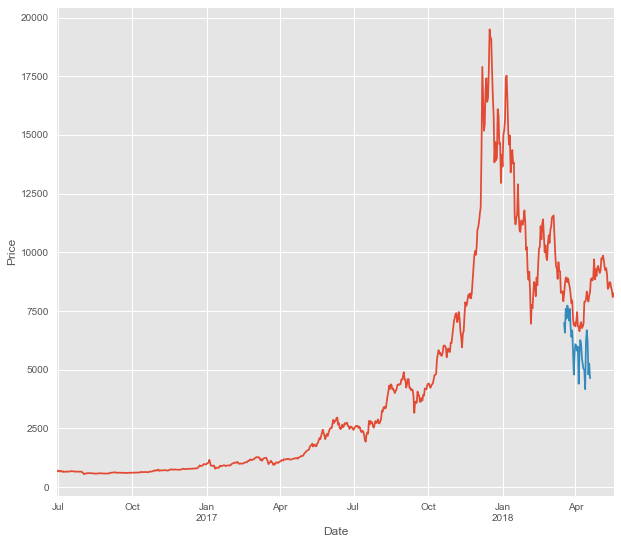

<IPython.core.display.Javascript object>

In [54]:
plt.figure(figsize=(10, 9))


lin_reg_full["Close"].plot()
# lin_reg_full["Close"].plot()

lin_reg["Forecast"].plot()
# lin_reg["Compound Sentiment Score"].plot()
# plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

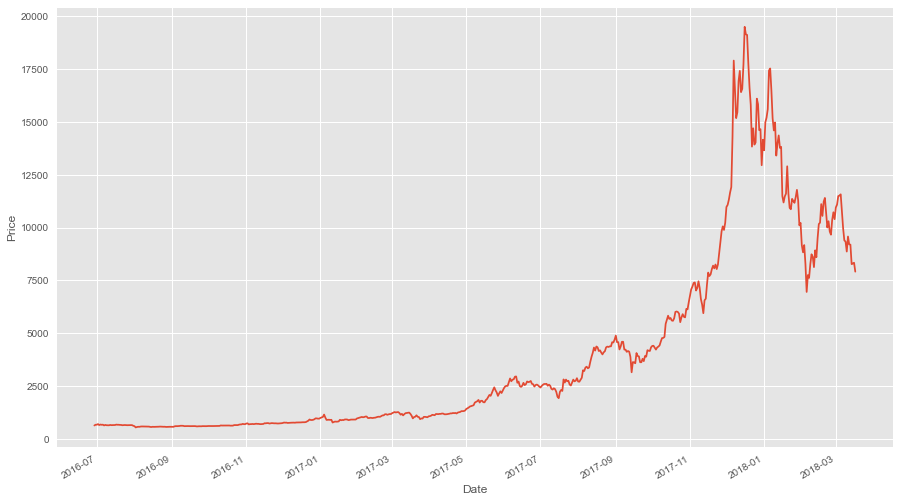

<IPython.core.display.Javascript object>

In [53]:
plt.figure(figsize=(15, 9))


lin_reg["Close"].plot()
# plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()